In [1]:
import pandas as pd
import numpy as np
import copy
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [72]:
filepath = '/home/user/Desktop/env2/VAR/macro/macro_analysis_sofr.xlsx'
df = pd.read_excel(filepath)
##########for the plot only
# df1=df[["Date","Libor 1M","BGCR Repo rates"]]
# df1.dropna(inplace=True)
# df1.index=df1['Date']
# df1=df1.drop(['Date'],axis=1)
##########upto this
####### For further analysis
df=df[["Date","SOFR 1M","Interest Rates","Inflation","GDP Per Capita","GDP history","Fedfunds","Treasury Rates","BGCR Repo rates"]]
# df=df[["Date","Libor 1M","BGCR Repo rates"]]
# df.dropna(inplace=True)
df.index=df['Date']
df=df.drop(['Date'],axis=1)
df.tail()

,SOFR 1M,Interest Rates,Inflation,GDP Per Capita,GDP history,Fedfunds,Treasury Rates,BGCR Repo rates
Date,,,,,,,,
01.12.2020,0.080800,0.25,1.36,46468,18719.206604,0.09,0.076364,0.065000
01.01.2021,0.081971,0.25,1.40,51605,19042.710610,0.09,0.076316,0.050526
01.02.2021,0.055410,0.25,1.68,47374,18867.884626,0.08,0.035789,0.028947
01.03.2021,0.025040,0.25,2.62,47374,18867.884626,0.07,0.024348,0.011304
01.04.2021,0.012080,0.25,3.48,47374,18867.884626,0.07,0.016667,0.010000


Text(0.5, 1.0, 'PLOT OF SOFR AGAINST INFLATION')

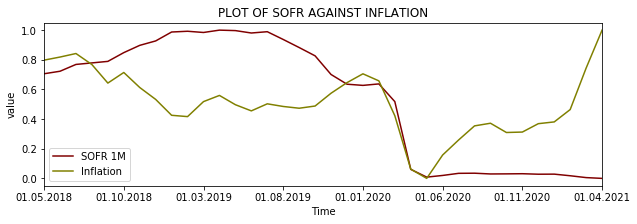

In [298]:
df_min_max_scaled = df.copy()
#df1_min_max_scaled=df1.copy()
# apply normalization techniques by Column 1
columns=df_min_max_scaled.columns
#columns1=df1_min_max_scaled.columns
for col in columns:
    df_min_max_scaled[col] = (df_min_max_scaled[col] - df_min_max_scaled[col].min()) / (df_min_max_scaled[col].max() - df_min_max_scaled[col].min())    
# for col in columns1:
#     df1_min_max_scaled[col] = (df1_min_max_scaled[col] - df1_min_max_scaled[col].min()) / (df1_min_max_scaled[col].max() - df1_min_max_scaled[col].min())    

plt.rcParams["figure.figsize"] = (10,3)
df_min_max_scaled["SOFR 1M"].plot(color="maroon",legend=True)
df_min_max_scaled["Inflation"].plot(color="olive",legend=True)
#df_min_max_scaled["Interest Rates"].plot(color="cyan",legend=True)
#plt.xticks([1-1-2016,1-1-2021])
plt.xlabel("Time")
plt.ylabel("value")
plt.title("PLOT OF SOFR AGAINST INFLATION")
    
    
    
    
# cols=list(df.columns)[1:]
# cols1=list(df1.columns[1:])
# view normalized data
#display(df1_min_max_scaled)
# plt.rcParams["figure.figsize"] = (20,10)
# fig, ax = plt.subplots(4,2)
# plt.suptitle("PLOT OF DIFFERENT MACRO VARIABLES WITH LIBOR MONTHLY AVERAGE DATA", fontsize=14)
# fig.delaxes(ax[3,1])
# c=0
# for i in range(4):
#     for j in range(2):
#         if c<=len(cols)-1:
#             ax[i,j].plot(df_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df_min_max_scaled[cols[c]])
#             ax[i,j].legend(["LIBOR 1M",cols[c]])
#             ax[i,j].set_xticks(["01-03-2016","01-03-2017","01-03-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")
#             c=c+1
#         else:
#             ax[i,j].plot(df1_min_max_scaled["Libor 1M"])
#             ax[i,j].plot(df1_min_max_scaled[cols1])
#             ax[i,j].legend(["LIBOR 1M",cols1])
#             ax[i,j].set_xticks(["01-04-2018","01-03-2019","01-03-2020","01-03-2021"])
#             ax[i,j].set_xlabel("Time")
#             ax[i,j].set_ylabel("Value")

In [4]:
df["Inflation_lag1"]=df["Inflation"].shift(-1)
#df["Inflation_lag2"]=df["Inflation"].shift(-2)
#df["Inflation_lag3"]=df["Inflation"].shift(-3)
df.dropna(inplace=True)
df.tail()

,SOFR 1M,Interest Rates,Inflation,GDP Per Capita,GDP history,Fedfunds,Treasury Rates,BGCR Repo rates,Inflation_lag1
Date,,,,,,,,,
01.11.2020,0.088980,0.25,1.17,46397,18715.264006,0.09,0.086842,0.065263,1.36
01.12.2020,0.080800,0.25,1.36,46468,18719.206604,0.09,0.076364,0.065000,1.40
01.01.2021,0.081971,0.25,1.40,51605,19042.710610,0.09,0.076316,0.050526,1.68
01.02.2021,0.055410,0.25,1.68,47374,18867.884626,0.08,0.035789,0.028947,2.62
01.03.2021,0.025040,0.25,2.62,47374,18867.884626,0.07,0.024348,0.011304,3.48


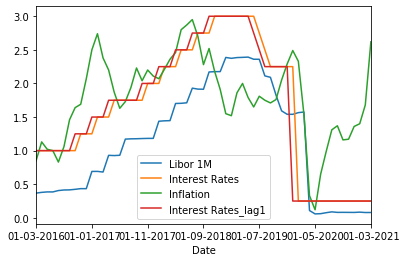

In [85]:
df["Interest Rates_lag1"]=df["Interest Rates"].shift(-1)
#df["Interest Rates_lag2"]=df["Interest Rates"].shift(-2)
#df["Interest Rates_lag3"]=df["Interest Rates"].shift(-3)
df.dropna(inplace=True)
df.tail()
df.plot(legend=True)

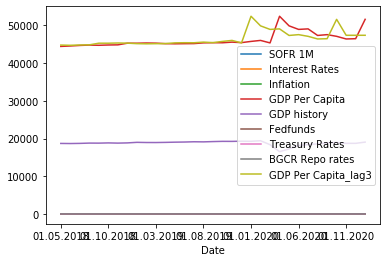

In [17]:
#df["GDP Per Capita_lag1"]=df["GDP Per Capita"].shift(-1)
#df["GDP Per Capita_lag2"]=df["GDP Per Capita"].shift(-2)
df["GDP Per Capita_lag3"]=df["GDP Per Capita"].shift(-3)
df.dropna(inplace=True)
df.tail()
df.plot(legend=True)

In [31]:
df["GDP history_lag1"]=df["GDP history"].shift(-1)
#df["GDP history_lag2"]=df["GDP history"].shift(-2)
#df["GDP history_lag3"]=df["GDP history"].shift(-3)
df.dropna(inplace=True)
df.tail()

,SOFR 1M,Interest Rates,Inflation,GDP Per Capita,GDP history,Fedfunds,Treasury Rates,BGCR Repo rates,GDP history_lag1
Date,,,,,,,,,
01.11.2020,0.088980,0.25,1.17,46397,18715.264006,0.09,0.086842,0.065263,18719.206604
01.12.2020,0.080800,0.25,1.36,46468,18719.206604,0.09,0.076364,0.065000,19042.710610
01.01.2021,0.081971,0.25,1.40,51605,19042.710610,0.09,0.076316,0.050526,18867.884626
01.02.2021,0.055410,0.25,1.68,47374,18867.884626,0.08,0.035789,0.028947,18867.884626
01.03.2021,0.025040,0.25,2.62,47374,18867.884626,0.07,0.024348,0.011304,18867.884626


In [45]:
#df["Fedfunds_lag1"]=df["Fedfunds"].shift(-1)
df["Fedfunds_lag2"]=df["Fedfunds"].shift(-2)
#df["Fedfunds_lag3"]=df["Fedfunds"].shift(-3)
df.dropna(inplace=True)
df.head()

,SOFR 1M,Interest Rates,Inflation,GDP Per Capita,GDP history,Fedfunds,Treasury Rates,BGCR Repo rates,Fedfunds_lag2
Date,,,,,,,,,
01.05.2018,1.735005,2.50,2.80,44421,18690.781398,1.70,1.706818,1.692727,1.91
01.06.2018,1.776230,2.50,2.87,44538,18665.766395,1.82,1.805238,1.807143,1.91
01.07.2018,1.888395,2.50,2.95,44678,18703.395762,1.91,1.893333,1.892857,1.95
01.08.2018,1.913430,2.75,2.70,44777,18782.487798,1.91,1.940870,1.903043,2.19
01.09.2018,1.938625,2.75,2.28,44720,18771.659480,1.95,2.036842,1.946842,2.20


In [59]:
df["Treasury Rates_lag1"]=df["Treasury Rates"].shift(-1)
#df["Treasury Rates_lag2"]=df["Treasury Rates"].shift(-2)
#df["Treasury Rates_lag3"]=df["Treasury Rates"].shift(-3)
df.dropna(inplace=True)
df.head()

,SOFR 1M,Interest Rates,Inflation,GDP Per Capita,GDP history,Fedfunds,Treasury Rates,BGCR Repo rates,Treasury Rates_lag1
Date,,,,,,,,,
01.05.2018,1.735005,2.50,2.80,44421,18690.781398,1.70,1.706818,1.692727,1.805238
01.06.2018,1.776230,2.50,2.87,44538,18665.766395,1.82,1.805238,1.807143,1.893333
01.07.2018,1.888395,2.50,2.95,44678,18703.395762,1.91,1.893333,1.892857,1.940870
01.08.2018,1.913430,2.75,2.70,44777,18782.487798,1.91,1.940870,1.903043,2.036842
01.09.2018,1.938625,2.75,2.28,44720,18771.659480,1.95,2.036842,1.946842,2.173636


In [73]:
#df["BGCR Repo rates_lag1"]=df["BGCR Repo rates"].shift(-1)
#df["BGCR Repo rates_lag2"]=df["BGCR Repo rates"].shift(-2)
df["BGCR Repo rates_lag3"]=df["BGCR Repo rates"].shift(-3)
df.dropna(inplace=True)
df.tail()

,SOFR 1M,Interest Rates,Inflation,GDP Per Capita,GDP history,Fedfunds,Treasury Rates,BGCR Repo rates,BGCR Repo rates_lag3
Date,,,,,,,,,
01.09.2020,0.084970,0.25,1.37,47544,18831.846527,0.09,0.089524,0.061905,0.065000
01.10.2020,0.086480,0.25,1.16,47096,18956.190721,0.09,0.086667,0.060952,0.050526
01.11.2020,0.088980,0.25,1.17,46397,18715.264006,0.09,0.086842,0.065263,0.028947
01.12.2020,0.080800,0.25,1.36,46468,18719.206604,0.09,0.076364,0.065000,0.011304
01.01.2021,0.081971,0.25,1.40,51605,19042.710610,0.09,0.076316,0.050526,0.010000


In [20]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Inflation"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.400


In [301]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Interest Rates"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.941


In [68]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["GDP Per Capita"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.772


In [114]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["GDP history"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.471


In [167]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Fedfunds"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.993


In [209]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["Treasury Rates"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.984


In [251]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["BGCR Repo rates"], df["SOFR 1M"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.992


In [74]:
# df=df[["Libor 1M","Inflation"]]
df=df[["SOFR 1M","BGCR Repo rates_lag3"]]
df.tail()

,SOFR 1M,BGCR Repo rates_lag3
Date,,
01.09.2020,0.084970,0.065000
01.10.2020,0.086480,0.050526
01.11.2020,0.088980,0.028947
01.12.2020,0.080800,0.011304
01.01.2021,0.081971,0.010000


In [75]:
#GRANGER'S CAUSALITY TEST TO DETERMINE THE PRESENCE OF RELATIONSHIPS BETWEEN TIME SERIES.
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=10
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            print(p_values)
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.3051, 0.4247, 0.5452, 0.6765, 0.0861, 0.0047, 0.0004, 0.0021, 0.0017, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


,SOFR 1M_x,BGCR Repo rates_lag3_x
SOFR 1M_y,1.0,0.0
BGCR Repo rates_lag3_y,0.0,1.0


In [76]:
#TRAIN-TEST SPLIT

nobs = int(0.1*len(df))
print(nobs)
df_train, df_test = df.iloc[:-nobs,:], df.iloc[-nobs:,:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

3
(30, 2)
(3, 2)


In [77]:
#AUGMENTED DICKEY-FULLER TEST FOR STATIONARITY

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
          
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SOFR 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2847
 No. Lags Chosen       = 8
 Critical value 1%     = -3.788
 Critical value 5%     = -3.013
 Critical value 10%    = -2.646
 => P-Value = 0.0156. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGCR Repo rates_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.0593
 No. Lags Chosen       = 0
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.9533. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




In [78]:
# 1st difference
df_differenced = df_train.diff().dropna()
df_diff=pd.DataFrame()
columns=df_train.columns
for col in columns:
    
    df_diff[str(col)+"difference1"]=df_train[str(col)].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "SOFR 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5313
 No. Lags Chosen       = 0
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.0072. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BGCR Repo rates_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9345
 No. Lags Chosen       = 0
 Critical value 1%     = -3.689
 Critical value 5%     = -2.972
 Critical value 10%    = -2.625
 => P-Value = 0.0018. Rejecting Null Hypothesis.
 => Series is Stationary.




In [93]:
# 2nd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference2"]=df_diff[str(col)+"difference1"].diff()
# df_diff["difference2"]=df_diff["difference1"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Libor 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.9681
 No. Lags Chosen       = 4
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Treasury Rates_lag3" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.3003
 No. Lags Chosen       = 3
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [61]:
# 3rd difference
df_differenced = df_differenced.diff().dropna()
for col in columns:
    
    df_diff[str(col)+"difference3"]=df_diff[str(col)+"difference2"].diff()
#df_diff["difference3"]=df_diff["difference2"].diff()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Libor 1M" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8553
 No. Lags Chosen       = 8
 Critical value 1%     = -3.593
 Critical value 5%     = -2.932
 Critical value 10%    = -2.604
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Treasury Rates_lag1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7465
 No. Lags Chosen       = 9
 Critical value 1%     = -3.597
 Critical value 5%     = -2.933
 Critical value 10%    = -2.605
 => P-Value = 0.0035. Rejecting Null Hypothesis.
 => Series is Stationary.




In [79]:
#FIT THE VAR MODEL

model = VAR(df_differenced)

/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/user/Desktop/env2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [80]:
#TRAINING THE MODEL

model_fitted = model.fit(3)  #place the lag value as parameter
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     14:18:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.91928
Nobs:                     26.0000    HQIC:                  -5.40164
Log likelihood:           12.9725    FPE:                 0.00381238
AIC:                     -5.59672    Det(Omega_mle):      0.00236655
--------------------------------------------------------------------
Results for equation SOFR 1M
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          -0.011729         0.040773           -0.288           0.774
L1.SOFR 1M                      0.347402         0.161012            2.158           0.031
L1.BGCR Repo rates

In [81]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
print(df_differenced)
forecast_input = df_differenced.values[-lag_order:]
forecast_input

3
             SOFR 1M  BGCR Repo rates_lag3
Date                                      
01.06.2018  0.041225              0.043799
01.07.2018  0.112165              0.220885
01.08.2018  0.025035              0.038273
01.09.2018  0.025195              0.124526
01.10.2018  0.144065              0.113283
01.11.2018  0.119860             -0.060652
01.12.2018  0.072790              0.010652
01.01.2019  0.146940              0.051429
01.02.2019  0.012360             -0.051602
01.03.2019 -0.020035             -0.021136
01.04.2019  0.038570              0.060682
01.05.2019 -0.007685             -0.316818
03.06.2019 -0.039570              0.139136
01.07.2019  0.021380             -0.419591
01.08.2019 -0.127895             -0.294856
01.09.2019 -0.132740             -0.025815
01.10.2019 -0.136880              0.005238
01.11.2019 -0.306960              0.047419
01.12.2019 -0.159875             -0.968349
01.01.2020 -0.019520             -0.583355
01.02.2020  0.024190              0.020310
01.03.202

array([[ 0.00212   ,  0.00431078],
       [-0.01247   , -0.00026316],
       [ 0.00151   , -0.01447368]])

In [82]:
# Forecast
od=1  #order of difference to make it stationary
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_'+str(od)+'d')
df_forecast

,SOFR 1M_1d,BGCR Repo rates_lag3_1d
Date,,
01.11.2020,-0.007141,-0.062057
01.12.2020,-0.016186,-0.072547
01.01.2021,-0.021667,-0.071217


In [83]:
#INVERT TRANSFORMATION TO GET REAL FORECAST
def invert(ori,diff_data):
    last_val=ori[-1]
    data=[]
    for idx,i in enumerate(diff_data):
        #print(idx,i+last_val)
        last_val+=i
        data.append(last_val)
    #print(len(data))
    return data

def invert_transformation(df_train, df_forecast,df_diff, difference):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:   
        if difference==3:
            df_fc[str(col)+"_2d"]=invert(list(df_diff[str(col)+"difference2"].values),list(df_fc[str(col)+"_3d"].values))
            df_fc[str(col)+"_1d"]=invert(list(df_diff[str(col)+"difference1"].values),list(df_fc[str(col)+"_2d"].values))
            df_fc[str(col)+" forecast"]=invert(list(df_train[str(col)].values),list(df_fc[str(col)+"_1d"].values)) 
        # Roll back 2nd Diff
        if difference==2:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
            # Roll back 1st Diff
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==1:
            df_fc[str(col)+' forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        elif difference==0:
            df_fc[str(col)+' forecast']=df_fc[str(col)+'_0d']
    return df_fc



df_results_all = invert_transformation(df_train, df_forecast,df_diff, od)
df_results=copy.deepcopy(df_results_all)
columns=df_results_all.columns
for col in columns:
    if len(col.split())==1:
        df_results.drop(col,axis=1,inplace=True)
print(df_results)
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

            SOFR 1M_1d  BGCR Repo rates_lag3_1d  SOFR 1M forecast  \
Date                                                                
01.11.2020   -0.007141                -0.062057          0.079339   
01.12.2020   -0.016186                -0.072547          0.063154   
01.01.2021   -0.021667                -0.071217          0.041486   

            BGCR Repo rates_lag3 forecast  
Date                                       
01.11.2020                      -0.011530  
01.12.2020                      -0.084077  
01.01.2021                      -0.155294  


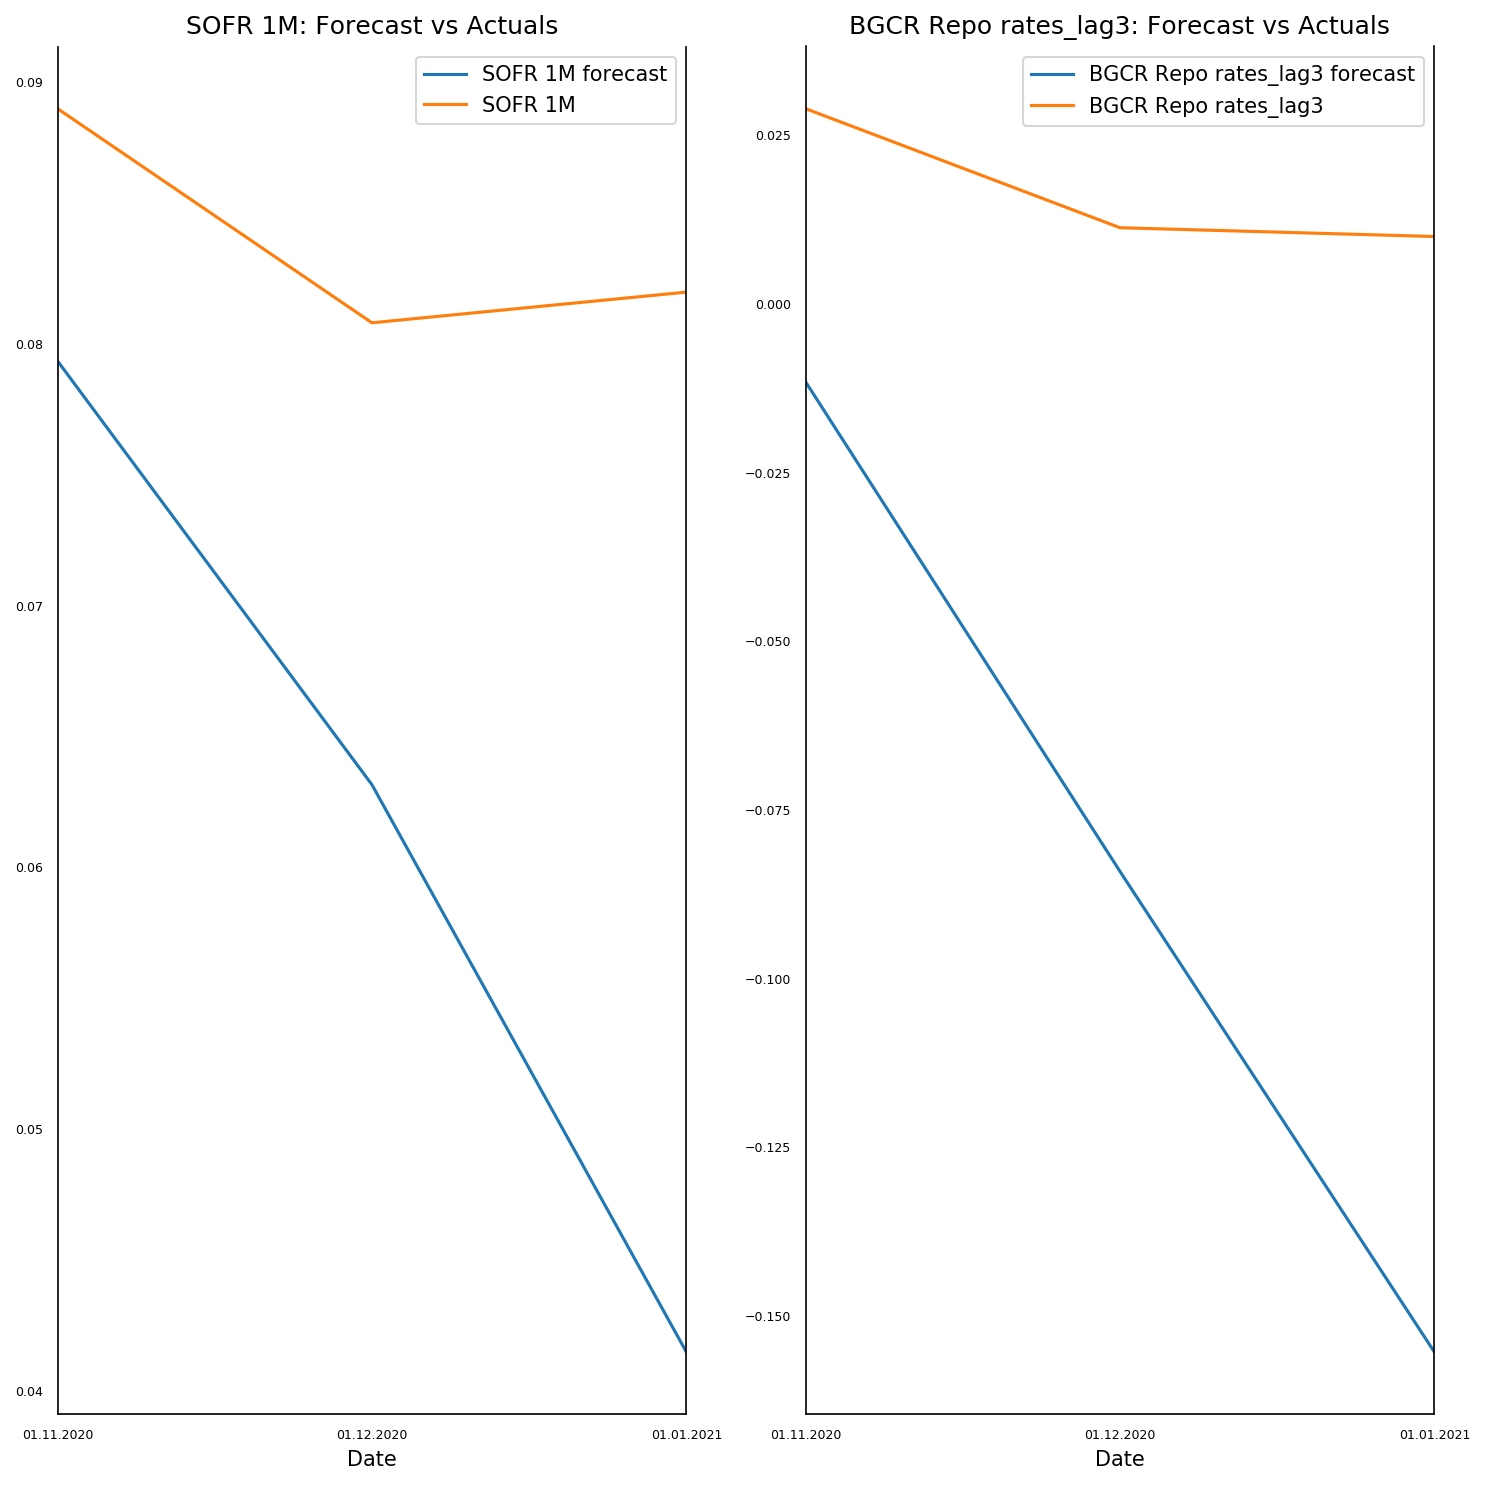

In [84]:
#PLOT OF ACTUAL VS FORECAST

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+' forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [85]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'rmse':rmse})
columns=df_train.columns
for col in columns:
    print('Forecast Accuracy of: '+str(col))
    accuracy_prod = forecast_accuracy(df_results[str(col)+' forecast'].values, df_test[str(col)])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: SOFR 1M
rmse :  0.0261
Forecast Accuracy of: BGCR Repo rates_lag3
rmse :  0.1126
